<a href="https://colab.research.google.com/github/SANTHIYA-7/OIBSIP/blob/main/email_spam_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **EMAIL SPAM DETECTION**

**IMPORT LIBRARIES**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud

%matplotlib inline

In [ ]:
from google.colab import files

In [ ]:
uploaded=files.upload()

Saving mail_data.csv to mail_data.csv


In [ ]:
sms=pd.read_csv('mail_data.csv')
sms

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
sms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
cv = CountVectorizer(decode_error='ignore')
X = cv.fit_transform(sms['Message'])

X_train, X_test, y_train, y_test = train_test_split(X, sms['Category'], test_size=0.3, random_state=101)

In [ ]:
sms['Message'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [ ]:
mnb = MultinomialNB()
mnb.fit(X_train,y_train)
print('training accuracy is --> ',mnb.score(X_train,y_train)*100)
print('test accuracy is --> ',mnb.score(X_test,y_test)*100)

training accuracy is -->  99.23076923076923
test accuracy is -->  98.20574162679426


In [ ]:
def visualize(Category):
    words = ''
    for msg in sms[sms['Category']==Category]['Message']:
        msg = msg.lower()
        words+=msg + ' '
    wordcloud = WordCloud(width=600,height=400).generate(words)
    plt.imshow(wordcloud)
    plt.axis('off')

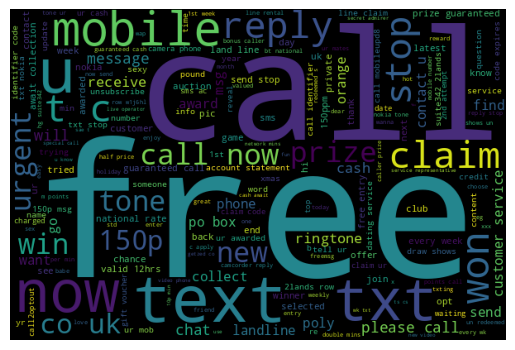

In [ ]:
visualize('spam')

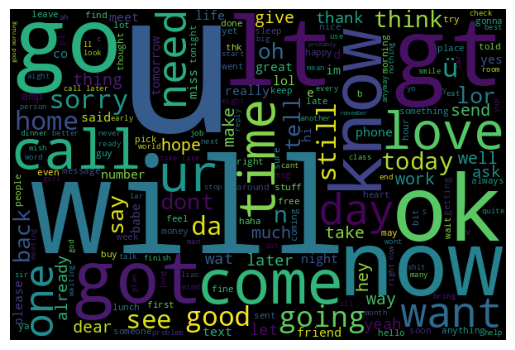

In [ ]:
visualize('ham')

In [ ]:
# just type in your message and run
your_message = 'You are the lucky winner for the lottery price of $6million.'
your_message = cv.transform([your_message])
claass = mnb.predict(your_message)
print(f'This is a {claass[0]} message')

This is a spam message
